### Question 1
### How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

#### Matrix_1 (2X2)

\begin{bmatrix}
    a & b\\
    p & q
\end{bmatrix}

#### Matrix_2 (2X3)

\begin{bmatrix}
    u & v & w\\
    x & y & z
\end{bmatrix}

#### Multiplication Matrix (2X3)

\begin{bmatrix}
    (a.u)+(b.x) & (a.v)+(b.y) & (a.w)+(b.z)\\
    (p.u)+(q.x) & (p.v)+(q.y) & (p.w)+(q.z)\\
\end{bmatrix}

#### Result:
1. Addition Operation: 6
2. Multiplication Operation: 12

#### Explain:

#### Matrix_1 (nXk)

\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nk} 
\end{bmatrix}

#### Matrix_2 (kXm)

\begin{bmatrix} 
    b_{11} & b_{12} & \dots \\
    \vdots & \ddots & \\
    b_{k1} &        & b_{km} 
\end{bmatrix}

#### Multiplication Matrix (nXm)

\begin{bmatrix} 
    (a_{11} . b_{11}) & (a_{12} . b_{21}) & \dots \\
    \vdots & \ddots & \\
    (a_{n1} . b_{11}) &        & (a_{nk} . b_{km}) 
\end{bmatrix}

#### Result

1. Additions : $n \times (k-1) \times m$
2. Multiplication : $n \times k \times m$


### Question 2
### Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
# import timeit module
import timeit

# import numpy module
import numpy as np

# take a 3x3 matrix A
matrix_A = [[12, 7, 3],
    [4, 5, 6],
    [7, 8, 9]]

# take a 3x4 matrix B
matrix_B = [[5, 8, 1, 2],
    [6, 7, 3, 0],
    [4, 5, 9, 1]]

# convert lists to Numpy arrays
np_matrix_A = np.array(matrix_A)
np_matrix_B = np.array(matrix_B)
 
# result will be 3x4

def multiply_matrices_python(matrix_A, matrix_B):   
    # Program to multiply two matrices using list comprehension
    result = [[sum(a * b for a, b in zip(A_row, B_col)) 
                        for B_col in zip(*matrix_B)]
                                for A_row in matrix_A]

    return result

result_python_code = multiply_matrices_python(matrix_A, matrix_B)
# Multiply matrices using NumPy
result_numpy = np.dot(np_matrix_A, np_matrix_B)

print("Result using Python Code:")
for r in result_python_code:
    print(r)
    
print("\nResult using NumPy:")
print(result_numpy)

# Measure time for Python lists
time_python = timeit.timeit(lambda: multiply_matrices_python(matrix_A, matrix_B), number=10000)

# Measure time for NumPy
time_numpy = timeit.timeit(lambda: np.dot(np_matrix_A, np_matrix_B), number=10000)

print(f"\nTime using Python lists: {time_python:.6f} seconds")
print(f"Time using NumPy: {time_numpy:.6f} seconds")



Result using Python Code:
[114, 160, 60, 27]
[74, 97, 73, 14]
[119, 157, 112, 23]

Result using NumPy:
[[114 160  60  27]
 [ 74  97  73  14]
 [119 157 112  23]]

Time using Python lists: 0.069374 seconds
Time using NumPy: 0.017015 seconds


##### The NumPy solution is expected to be faster for larger matrices. NumPy is optimized for numerical operations, making it more efficient than pure Python lists, for large-scale matrix operations.

### Question 3
### Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

### Method 1: Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array

In [2]:
def method_1(arr):
  n = len(arr)
  # Copy the array
  arr = arr.copy()
  for i in range(n//2 + 1):
    # Find the highest element in the current array
    max_index = 0
    max_value = arr[0]
    for j in range(1, n - i):
      if arr[j] > max_value:
        max_index = j
        max_value = arr[j]
    # Swap 
    arr[max_index], arr[n - i - 1] = arr[n - i - 1], arr[max_index]
  # If n is odd, return the middle element
  if n % 2 == 1:
    return arr[n//2]
  # If n is even, return the average of the middle two elements
  else:
    return (arr[n//2 - 1] + arr[n//2]) / 2

### Method 2: Using the median-of-medians algorithm

In [3]:
def method_2(arr):
  n = len(arr)
  # Base case
  if n == 1:
    return arr[0]
  # Divide the array into subarrays of size 5
  subarrays = [arr[i:i+5] for i in range(0, n, 5)]
  # Find the median of each subarray
  medians = [sorted(sub)[len(sub)//2] for sub in subarrays]
  pivot = method_2(medians)
  # Partition
  left = [x for x in arr if x < pivot]
  middle = [x for x in arr if x == pivot]
  right = [x for x in arr if x > pivot]
  if len(left) > n//2:
    return method_2(left)
  elif len(left) + len(middle) > n//2:
    return pivot
  else:
    return method_2(right)

### Time

In [4]:
arr = [4,6,5,10,12]
# Method 1
med_1 = method_1(arr)
time_method_1 = timeit.timeit(lambda: method_1(arr), number=10000)
print(f"\nMethod 1: Median = {med_1}, Time = {time_method_1:.6f} seconds")

# Method 2
med_2 = method_2(arr)
time_method_2 = timeit.timeit(lambda: method_2(arr), number=10000)
print(f"\nMethod 2: Median = {med_2}, Time = {time_method_2:.6f} seconds")



Method 1: Median = 6, Time = 0.031096 seconds

Method 2: Median = 6, Time = 0.046136 seconds


### Numpy median

In [5]:
med_3 = np.median(arr)
print(f"Numpy median: Median = {med_3}, Time = {timeit.timeit(lambda: med_3, number=10000)} seconds")

Numpy median: Median = 6.0, Time = 0.0009236000000001354 seconds


### Question 4
### What is the gradient of the following function with respect to x and y?
$$x^{2}y + y^3sin(x)$$

##### The gradient of a function $f$, denoted as $\nabla f$, is the collection of all its partial derivatives into a vector.

$$ 
\nabla f(x_0,y_0,...) = \begin{bmatrix}
\frac{\delta f}{\delta x} (x_0,y_0,...) \\[0.3em]
\frac{\delta f}{\delta y} (x_0,y_0,...) \\[0.3em]
\vdots
\end{bmatrix}
$$

##### Find the partial derivative with respect to $ \frac{\delta f}{\delta x} $
$$ 
\frac{\delta}{\delta x} (x^{2}y + y^3sin(x))
= 2xy + y^3cos(x)
$$

##### Find the partial derivative with respect to $ \frac{\delta f}{\delta y} $
$$ 
\frac{\delta}{\delta y} (x^{2}y + y^3sin(x))
= x^2 + 3y^2sin(x)
$$

##### Final 
$$ 
\nabla f(x , y) = \begin{bmatrix}
2xy + y^3cos(x) \\[0.3em]
x^2 + 3y^2sin(x)
\end{bmatrix}
$$

### Question 5
### Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

##### JAX - NumPy on the CPU, GPU, and TPU, with great automatic differentiation for high-performance machine learning research.


In [6]:
import jax
import jax.numpy as jnp

# Define the function
def f(x, y):
    return ((x**2) * y) + ((y**3) * (jnp.sin(x)))

# The gradient is a function that takes a pair of inputs and returns a pair of outputs
grad_f = jax.grad(f, argnums=(0, 1))
# print(grad_f)
# Generate some random values of x and y
key = jax.random.PRNGKey(0)
# print(key)
x, y = jax.random.uniform(key, shape=(2,))
# print(x,y)

# Evaluate the gradient using JAX
grad_f_x, grad_f_y = grad_f(x, y)
print("Gradient using JAX:", grad_f_x, grad_f_y)

# Evaluate the gradient using the analytical solution
grad_f_x_analytical_solution = ((2 * x) * y) + ((y**3) * (jnp.cos(x)))
grad_f_y_analytical_solution = (x**2) + ((3 * (y**2)) * (jnp.sin(x)))
print("Gradient using the analytical solution:", grad_f_x_analytical_solution, grad_f_y_analytical_solution)

print()
print("The Gradient Matched!!")



Gradient using JAX: 0.85570043 0.46309963
Gradient using the analytical solution: 0.85570043 0.46309963

The Gradient Matched!!


### Question 6
### Use sympy to confirm that you obtain the same gradient analytically.

##### symPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.

In [7]:
import sympy as sp

x , y = sp.symbols('x y')
# print(x , y)

f = ((x**2) * y) + ((y**3) * (sp.sin(x)))

f_x = f.diff(x)
print("Partial derivative with respect to x: ", f_x) # output 2*x*y + y**3*cos(x)

f_y = f.diff(y)
print("Partial derivative with respect to y: ",f_y) # output x**2 + 3*y**2*sin(x)
print()

print("Gradient matrix:", sp.Matrix([[f_x] , [f_y]]))

Partial derivative with respect to x:  2*x*y + y**3*cos(x)
Partial derivative with respect to y:  x**2 + 3*y**2*sin(x)

Gradient matrix: Matrix([[2*x*y + y**3*cos(x)], [x**2 + 3*y**2*sin(x)]])


### Question 7
### Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks Something like:

- 2022
    - Branch 1
        - Roll Number: 1
        - Name: N
        - Marks
            - Maths: 100
            - English: 70
    - Branch 2
- 2023
    - Branch 1
    - Branch 2
- 2024
    - Branch 1
    - Branch 2
- 2025
    - Branch 1
    - Branch 2

##### Dictionary - Dictionaries are used to store data values in key:value pairs.
##### A dictionary is a collection which is ordered*, changeable and do not allow duplicates.

``` python
nested_dict = {
    'key_1' : {
        'nested_key_1' : 'value_1'
    },
    'key_2' : {
        'nested_key_2' : 'value_2'
    }
}
```

In [8]:
students = {
    2022: {
        'Branch 1' : {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths' : 100,
                'English' : 70
            }
        },
        'Branch 2' : {}
    },
    2023: {
        'Branch 1' : {},
        'Branch 2' : {}
    },
    2024: {
        'Branch 1' : {},
        'Branch 2' : {}
    },
    2025: {
        'Branch 1' : {},
        'Branch 2' : {}
    }
}

print(students[2022]['Branch 1']['Marks'])

{'Maths': 100, 'English': 70}


### Question 8

### Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [9]:
class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)


class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

data = [Year(2022) , Year(2023) , Year(2024) , Year(2025)]

for _ in range(len(data)):
    data[_].add_branch(Branch('Branch 1'))
    data[_].add_branch(Branch('Branch 2'))
    
data[0].branches[0].add_student(Student(1, 'N', {'Maths': 100, 'English': 70}))

print(data[0].year) # Output: 2022
print(data[0].branches[0].name) # Output: Branch 1
print(data[0].branches[0].students[0].name) # Output: N
print(data[0].branches[0].students[0].roll_number) # Output: 1
print(data[0].branches[0].students[0].marks['Maths']) # Output: 100
print(data[0].branches[0].students[0].marks['English']) # Output: 70


2022
Branch 1
N
1
100
70


### Question 9

#### Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $  y = x $
2. $ y = x^2 $
3. $ y = \frac{x^3}{100} $
4. $ y = sin(x) $
5. $ y = log(x) $
6. $ y = e^x $

## 1. $ y = x $

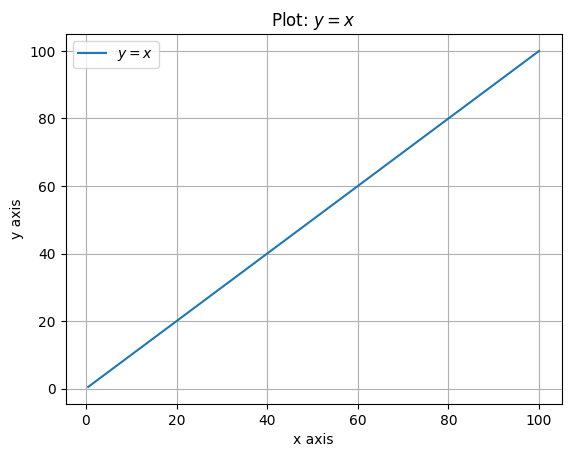

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)
y = x

plt.plot(x,y,label = '$y = x$')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Plot: $y = x$')

plt.grid(True)

plt.legend()
plt.show()

## 2. $ y = x^2 $

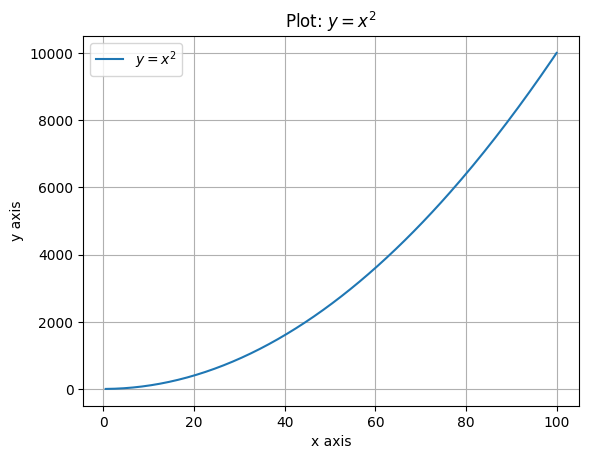

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)
y = x**2

plt.plot(x,y,label = '$y = x^2$')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Plot: $y = x^2$')

plt.grid(True)

plt.legend()
plt.show()

## 3. $ y = \frac{x^3}{100} $

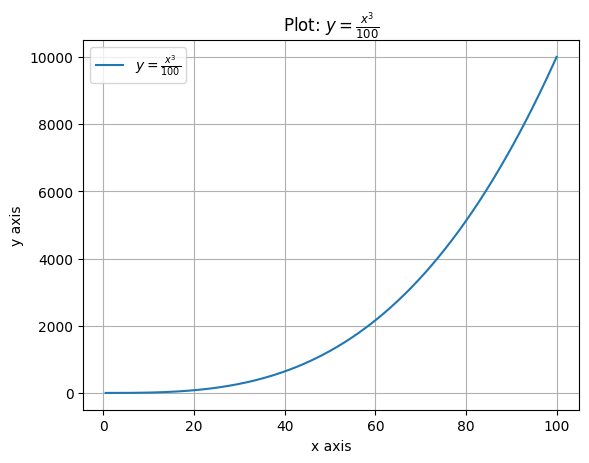

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)
y = (x**3)/100

plt.plot(x,y,label = '$y = \\frac{x^3}{100}$')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Plot: $y = \\frac{x^3}{100}$')

plt.grid(True)

plt.legend()
plt.show()

## 4. $ y = sin(x) $

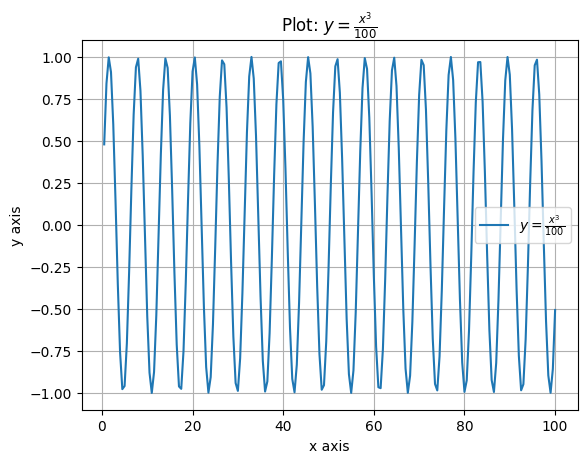

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)
y = np.sin(x)

plt.plot(x,y,label = '$y = \\frac{x^3}{100}$')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Plot: $y = \\frac{x^3}{100}$')

plt.grid(True)

plt.legend()
plt.show()

## 5. $ y = log(x) $

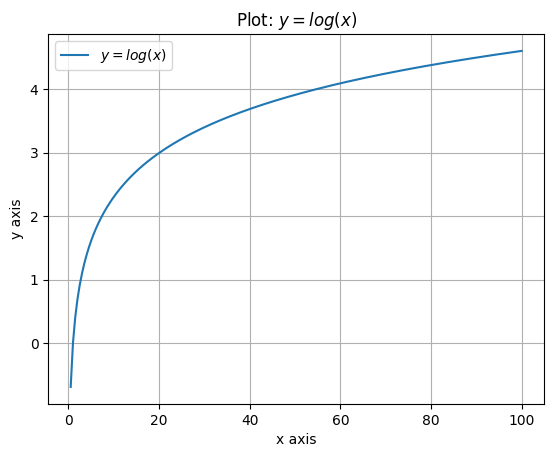

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)
y = np.log(x)

plt.plot(x,y,label = '$ y = log(x) $')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Plot: $ y = log(x) $')

plt.grid(True)

plt.legend()
plt.show()

## 6. $ y = e^x $

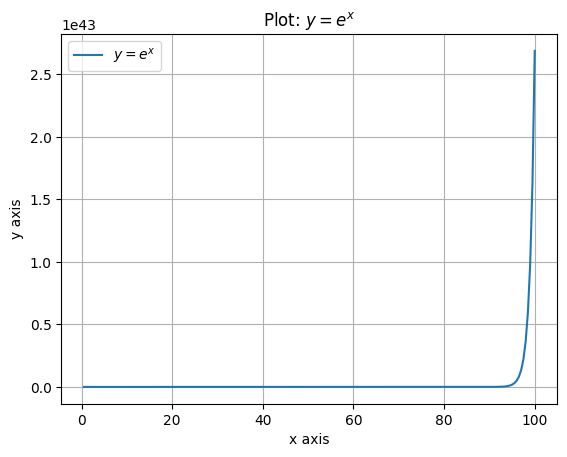

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)
y = np.exp(x)

plt.plot(x,y,label = '$ y = e^x $')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Plot: $ y = e^x $')

plt.grid(True)

plt.legend()
plt.show()

### Question 10
### Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

#### Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. 

In [16]:
import numpy as np

# matrix of size 20X5 with random numbers from 1 to 2
matrix = np.random.uniform (1, 2, size= (20, 5))

print(matrix)

[[1.17822215 1.96881393 1.28077862 1.31731598 1.90790682]
 [1.66105207 1.8799776  1.96303991 1.01108044 1.60228967]
 [1.73068506 1.57500806 1.61875621 1.82284264 1.86078092]
 [1.02933288 1.85520027 1.49370747 1.54440323 1.27424265]
 [1.94727927 1.33257309 1.19365767 1.61008847 1.46607166]
 [1.99037395 1.55143764 1.28390155 1.46191246 1.47673777]
 [1.5166985  1.84925052 1.62217849 1.1458573  1.44583264]
 [1.85393592 1.85157572 1.34150933 1.36468046 1.14560665]
 [1.2619745  1.73879162 1.6056522  1.73259003 1.23562495]
 [1.05713985 1.62073436 1.73237172 1.0209323  1.0209985 ]
 [1.39895916 1.87410737 1.81193799 1.26751131 1.16775725]
 [1.41003867 1.79650198 1.62261081 1.59912223 1.62015153]
 [1.93899094 1.36084008 1.84924204 1.82672955 1.66859858]
 [1.12782264 1.08643447 1.27956733 1.572572   1.08271157]
 [1.20700767 1.0519707  1.63634285 1.2582923  1.62819092]
 [1.55232295 1.2722494  1.64808625 1.66470503 1.16909736]
 [1.61702562 1.8210798  1.26546647 1.70665148 1.88066237]
 [1.95208674 1

#### Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”.

In [17]:
import pandas as pd

# dataframe from the matrix
dataframe = pd.DataFrame (data=matrix, columns= ['a', 'b', 'c', 'd', 'e'])
print(dataframe)

           a         b         c         d         e
0   1.178222  1.968814  1.280779  1.317316  1.907907
1   1.661052  1.879978  1.963040  1.011080  1.602290
2   1.730685  1.575008  1.618756  1.822843  1.860781
3   1.029333  1.855200  1.493707  1.544403  1.274243
4   1.947279  1.332573  1.193658  1.610088  1.466072
5   1.990374  1.551438  1.283902  1.461912  1.476738
6   1.516699  1.849251  1.622178  1.145857  1.445833
7   1.853936  1.851576  1.341509  1.364680  1.145607
8   1.261975  1.738792  1.605652  1.732590  1.235625
9   1.057140  1.620734  1.732372  1.020932  1.020998
10  1.398959  1.874107  1.811938  1.267511  1.167757
11  1.410039  1.796502  1.622611  1.599122  1.620152
12  1.938991  1.360840  1.849242  1.826730  1.668599
13  1.127823  1.086434  1.279567  1.572572  1.082712
14  1.207008  1.051971  1.636343  1.258292  1.628191
15  1.552323  1.272249  1.648086  1.664705  1.169097
16  1.617026  1.821080  1.265466  1.706651  1.880662
17  1.952087  1.948146  1.221847  1.341338  1.

#### Find the column with the highest standard deviation.

In [18]:
standard_deviation = dataframe.std()
print(standard_deviation)
column_with_highest_standard_deviation = standard_deviation.idxmax()
print()
print("Column with the highest standard deviation:", column_with_highest_standard_deviation)


a    0.315944
b    0.296694
c    0.251041
d    0.244454
e    0.272253
dtype: float64

Column with the highest standard deviation: a


#### Find the row with the lowest mean.

In [19]:
row_means = dataframe.mean(axis=1)
print(row_means)
row_with_lowest_mean = row_means.idxmin()
print()
print("Row with the lowest mean:", row_with_lowest_mean)


0     1.530607
1     1.623488
2     1.721615
3     1.439377
4     1.509934
5     1.552873
6     1.515963
7     1.511462
8     1.514927
9     1.290435
10    1.504055
11    1.609685
12    1.728880
13    1.229822
14    1.356361
15    1.461292
16    1.658177
17    1.550502
18    1.356501
19    1.428412
dtype: float64

Row with the lowest mean: 13


### Question 11
### Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

#### Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”.

In [20]:
dataframe['f'] = dataframe.sum(axis=1)
print(dataframe)

           a         b         c         d         e         f
0   1.178222  1.968814  1.280779  1.317316  1.907907  7.653037
1   1.661052  1.879978  1.963040  1.011080  1.602290  8.117440
2   1.730685  1.575008  1.618756  1.822843  1.860781  8.608073
3   1.029333  1.855200  1.493707  1.544403  1.274243  7.196886
4   1.947279  1.332573  1.193658  1.610088  1.466072  7.549670
5   1.990374  1.551438  1.283902  1.461912  1.476738  7.764363
6   1.516699  1.849251  1.622178  1.145857  1.445833  7.579817
7   1.853936  1.851576  1.341509  1.364680  1.145607  7.557308
8   1.261975  1.738792  1.605652  1.732590  1.235625  7.574633
9   1.057140  1.620734  1.732372  1.020932  1.020998  6.452177
10  1.398959  1.874107  1.811938  1.267511  1.167757  7.520273
11  1.410039  1.796502  1.622611  1.599122  1.620152  8.048425
12  1.938991  1.360840  1.849242  1.826730  1.668599  8.644401
13  1.127823  1.086434  1.279567  1.572572  1.082712  6.149108
14  1.207008  1.051971  1.636343  1.258292  1.628191  6

#### Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. 

In [21]:
dataframe['g'] = np.where(dataframe['f'] < 8 , 'LT8' , 'GT8')
print(dataframe)

           a         b         c         d         e         f    g
0   1.178222  1.968814  1.280779  1.317316  1.907907  7.653037  LT8
1   1.661052  1.879978  1.963040  1.011080  1.602290  8.117440  GT8
2   1.730685  1.575008  1.618756  1.822843  1.860781  8.608073  GT8
3   1.029333  1.855200  1.493707  1.544403  1.274243  7.196886  LT8
4   1.947279  1.332573  1.193658  1.610088  1.466072  7.549670  LT8
5   1.990374  1.551438  1.283902  1.461912  1.476738  7.764363  LT8
6   1.516699  1.849251  1.622178  1.145857  1.445833  7.579817  LT8
7   1.853936  1.851576  1.341509  1.364680  1.145607  7.557308  LT8
8   1.261975  1.738792  1.605652  1.732590  1.235625  7.574633  LT8
9   1.057140  1.620734  1.732372  1.020932  1.020998  6.452177  LT8
10  1.398959  1.874107  1.811938  1.267511  1.167757  7.520273  LT8
11  1.410039  1.796502  1.622611  1.599122  1.620152  8.048425  GT8
12  1.938991  1.360840  1.849242  1.826730  1.668599  8.644401  GT8
13  1.127823  1.086434  1.279567  1.572572  1.08

#### Find the number of rows in the dataframe where the value in the column “g” is “LT8”. 

In [22]:
print(dataframe[dataframe['g'] == 'LT8'])
num_rows = len(dataframe[dataframe['g'] == 'LT8'])
print()
print('The number of rows in the dataframe where the value in the column “g” is “LT8”' , num_rows)

           a         b         c         d         e         f    g
0   1.178222  1.968814  1.280779  1.317316  1.907907  7.653037  LT8
3   1.029333  1.855200  1.493707  1.544403  1.274243  7.196886  LT8
4   1.947279  1.332573  1.193658  1.610088  1.466072  7.549670  LT8
5   1.990374  1.551438  1.283902  1.461912  1.476738  7.764363  LT8
6   1.516699  1.849251  1.622178  1.145857  1.445833  7.579817  LT8
7   1.853936  1.851576  1.341509  1.364680  1.145607  7.557308  LT8
8   1.261975  1.738792  1.605652  1.732590  1.235625  7.574633  LT8
9   1.057140  1.620734  1.732372  1.020932  1.020998  6.452177  LT8
10  1.398959  1.874107  1.811938  1.267511  1.167757  7.520273  LT8
13  1.127823  1.086434  1.279567  1.572572  1.082712  6.149108  LT8
14  1.207008  1.051971  1.636343  1.258292  1.628191  6.781804  LT8
15  1.552323  1.272249  1.648086  1.664705  1.169097  7.306461  LT8
17  1.952087  1.948146  1.221847  1.341338  1.289093  7.752511  LT8
18  1.433364  1.267860  1.460180  1.361252  1.25

#### Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [23]:
print(dataframe.groupby('g')['f'].std())

g
GT8    0.274530
LT8    0.496766
Name: f, dtype: float64


### Question 12
### Write a small piece of code to explain broadcasting in numpy.

In [24]:
import numpy as np
#  2D array 
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
# print(a)
# 1D array
b = np.array([5]*3)
# print(b)
# Add the two arrays of different shapes
# numpy automatically broadcasts b to match the shape of a
c = a + b
print(c)

[[ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


### Question 13
### Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [25]:
import numpy as np

def argmin(array):
    min_value = array[0]
    min_index = 0
    for _ in range(1, len(array)):
        if array[_] < min_value:
          min_value = array[_]
          min_index = _
    return min_index

array = np.array([1, 12, 14, -1, 5])
print("Array:", array)
print("Index of the minimum element:", argmin(array))

# Verify the solution using np.argmin
print("Using np.argmin:", np.argmin(array))


Array: [ 1 12 14 -1  5]
Index of the minimum element: 3
Using np.argmin: 3
